## Twitter Sentiment Analysis

[Article Link](https://medium.com/@nikitasilaparasetty/twitter-sentiment-analysis-for-data-science-using-python-in-2022-6d5e43f6fa6e)

In [1]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [2]:
# Set up keys and auth api keys

import constants

consumer_key = constants.TWITTER_PUBLIC_API_KEY
consumer_secret = constants.TWITTER_PRIVATE_API_KEY

access_token = constants.TWITTER_ACCESS_TOKEN
access_token_secret = constants.TWITTER_PRIVATE_ACCESS_TOKEN

bearer_token = constants.TWITTER_BEARER_TOKEN


In [3]:
# Access Twitter Data

client = tweepy.Client(consumer_key, consumer_secret, access_token, access_token_secret)
# auth.set_access_token(access_token, access_token_secret)

# api = tweepy.API(auth)

# client = tweepy.Client(constants.TWITTER_BEARER_TOKEN)



# Can't retrieve old tweets with current account type - need research access

In [6]:
# tweet_ids=[22662042404, 22662135903, 22662138503]

response = client.search_recent_tweets('#titans', max_results=10)



Unauthorized: 401 Unauthorized
Unauthorized

We will first input a query from the user. We will then generate a list of the latest tweets, their users, and their locations, based on that query.

In [5]:
# Input a query from the user

query = "#CFL"

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, q=filtered,lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

print(list1[:5])

NameError: name 'api' is not defined

In [ ]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, columns=['tweets','user', "location"])# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [ ]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
# run tweets through clean_tweet function and display

cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

['nah college dropout skits are hilarious broke fi broke we aint got it',
 'love this guy his presence support his team he along with amar doman are what nee',
 'playoffs divisional final odds eastern final mtl alouettes 3 5 110 amp 138 tor argonauts 3 5 110 amp',
 'coach o show with november 8th 2022 via via',
 'offensive coordinator is first item roughriders offseason shopping list via',
 'analysis division finals sunday are loaded with talent via via',
 'pretty negative comments will be great football played outside great cfl feel real football',
 'weekly predictor believing bombers via',
 'thats eye watering li',
 '3 storylines watch western final via',
 'injuries return is never as good as before whoever signs this guy as s',
 'was great moment eric epic canadiana moment',
 'schedule events 109th grey cup championship week regina via',
 'congratulations our cfl hall fans winner deborah way go stay tuned our next lucky winner',
 'yeah im aware that re nfl still good model thats wor

### Sentiment Analysis

In [ ]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0:5]

(0.5,
 [TextBlob("nah college dropout skits are hilarious broke fi broke we aint got it"),
  TextBlob("love this guy his presence support his team he along with amar doman are what nee"),
  TextBlob("playoffs divisional final odds eastern final mtl alouettes 3 5 110 amp 138 tor argonauts 3 5 110 amp"),
  TextBlob("coach o show with november 8th 2022 via via"),
  TextBlob("offensive coordinator is first item roughriders offseason shopping list via")])

In [ ]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]# Print all the sentiment values

sentiment_values[0:99]

[[0.5,
  'nah college dropout skits are hilarious broke fi broke we aint got it'],
 [0.5,
  'love this guy his presence support his team he along with amar doman are what nee'],
 [0.0,
  'playoffs divisional final odds eastern final mtl alouettes 3 5 110 amp 138 tor argonauts 3 5 110 amp'],
 [0.0, 'coach o show with november 8th 2022 via via'],
 [0.25,
  'offensive coordinator is first item roughriders offseason shopping list via'],
 [0.0, 'analysis division finals sunday are loaded with talent via via'],
 [0.2916666666666667,
  'pretty negative comments will be great football played outside great cfl feel real football'],
 [0.0, 'weekly predictor believing bombers via'],
 [0.0, 'thats eye watering li'],
 [0.0, '3 storylines watch western final via'],
 [0.7,
  'injuries return is never as good as before whoever signs this guy as s'],
 [0.45, 'was great moment eric epic canadiana moment'],
 [-0.05, 'schedule events 109th grey cup championship week regina via'],
 [0.16666666666666666,
  

### Create a DF of each tweet against its calculated polarity

In [ ]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.50,nah college dropout skits are hilarious broke ...
1,0.50,love this guy his presence support his team he...
2,0.00,playoffs divisional final odds eastern final m...
3,0.00,coach o show with november 8th 2022 via via
4,0.25,offensive coordinator is first item roughrider...
...,...,...
95,-0.78,very disappointing stampeders mistakes costly ...
96,0.50,awesome sergio will you be playing it next yea...
97,0.40,cfl playoff football is like 1000 times more e...
98,0.00,soon as it hit 11 i m hitting up cfl


In [ ]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.50
1     0.50
2     0.00
3     0.00
4     0.25
      ... 
95   -0.78
96    0.50
97    0.40
98    0.00
99    0.00
Name: polarity, Length: 100, dtype: float64

We will now initialize three variables, ‘pos’, ‘neg’ and ‘neu’.   
We will use these variables to create a loop to classify the tweets as positive, negative, and neutral.

In [ ]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Positive
Positive
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Negative
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Negative
Positive
Positive
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Positive
Neutral
Negative
Positive
Negative
Neutral
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Neutral
Positive
Negative
Positive
Positive
Neutral
Neutral
45 9 46


### Create pie chart to display results

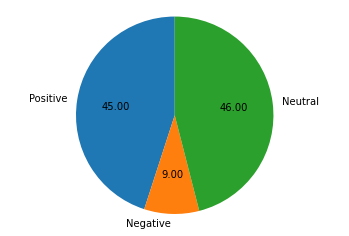

In [ ]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

### Identify certain terms that are most common in this topic with word cloud

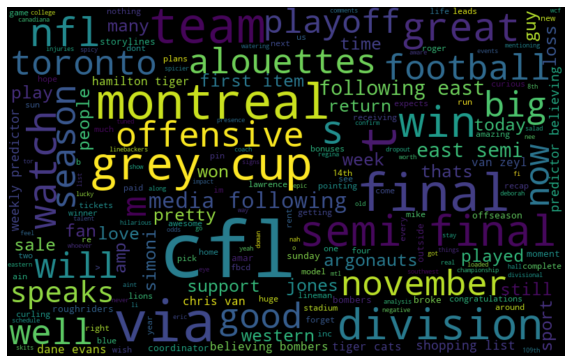

In [ ]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()